In [12]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('2023cleaned.csv')

def get_median_in_range(age_range):
    if age_range == "71+":
        return 73
    low, high = map(int, age_range.split('-'))
    return (low + high) // 2

# replace Nan with 0
data['Children'] = data['Children'].fillna(0)
data['Additional Children'] = data['Additional Children'].fillna(0)
data['Totalchildren'] = data['Children'] + data['Additional Children']
data = data[data['Retire age'] != 'Undecided'].dropna(subset=['Retire age'])
childfree = data[data['Totalchildren'] == 0].dropna(subset=['Retire age'])
haschildren = data[data['Totalchildren'] > 0].dropna(subset=['Retire age'])

childfree['Retire age'] = childfree['Retire age'].apply(get_median_in_range)
haschildren['Retire age'] = haschildren['Retire age'].apply(get_median_in_range)
data['Retire age'] = data['Retire age'].apply(get_median_in_range)


Does having children affects planned age to retire?

In [14]:
stats.ttest_ind(childfree['Retire age'], haschildren['Retire age'], equal_var=False).pvalue

np.float64(1.1826002287529419e-14)

How does the number of children affects planned age to retire?

1.184508329571863 46.45488489914721 1.5378187642193253e-12
Contributors           1302
Currency               1302
Age                    1300
Relationship           1301
Children               1302
Additional Children    1302
Amount to retire       1111
FI rate                1113
Retire age             1302
Wage                   1037
Totalchildren          1302
Predicted age          1302
alt age                1302
dtype: int64


Text(0, 0.5, 'Predicted Retirement Age')

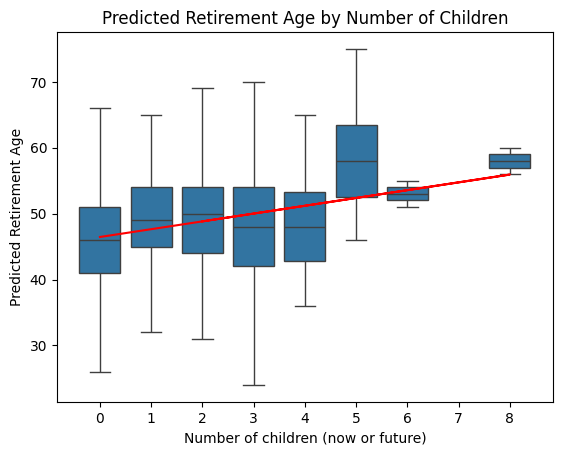

In [15]:
result = stats.linregress(data['Totalchildren'], data['Retire age'])
print(result.slope, result.intercept, result.pvalue)
data['Predicted age'] = result.slope * data['Totalchildren'] + result.intercept
data['Totalchildren'] = data['Totalchildren'].astype(int)

def expand_row(val):
    return list(np.arange(val-2, val+3))

data['alt age'] = data['Retire age'].apply(expand_row)
exploded = data[['Totalchildren', 'alt age']].explode('alt age')

print(data.count())

sns.boxplot(x='Totalchildren', y='alt age', data=exploded, showfliers=False, order=range(9))
plt.plot(data['Totalchildren'], data['Predicted age'], color='red')
plt.title("Predicted Retirement Age by Number of Children")
plt.xlabel('Number of children (now or future)')
plt.ylabel('Predicted Retirement Age')

How much will having a child add to the amount needed to retire?

Slope: 269883.50306656986, Intercept: 2133201.4483885868
Slope CI: (194172.22685222837, 345594.7792809113)
4.603098782579364e-12
Contributors           1111
Currency               1111
Age                    1109
Relationship           1110
Children               1111
Additional Children    1111
Amount to retire       1111
FI rate                1107
Retire age             1111
Wage                    896
Totalchildren          1111
Predicted age          1111
alt age                1111
predicted              1111
dtype: int64


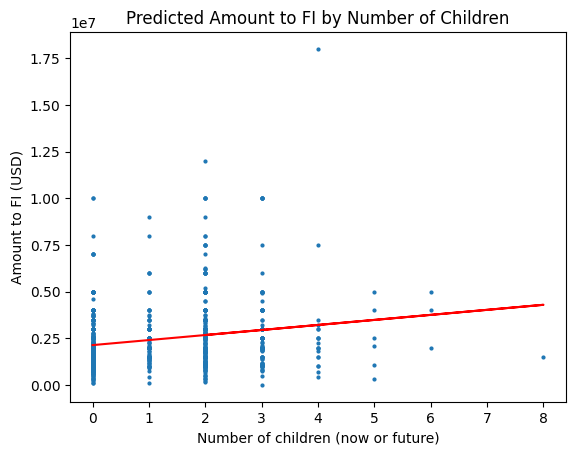

In [16]:
data = data.dropna(subset=['Totalchildren', 'Amount to retire'])
result = stats.linregress(data['Totalchildren'], data['Amount to retire'])
crit_t = stats.t.ppf(0.975, len(data) - 2)
print(f"Slope: {result.slope}, Intercept: {result.intercept}")
print(f"Slope CI: ({result.slope - crit_t * result.stderr}, {result.slope + crit_t * result.stderr})")
print(result.pvalue)
plt.scatter(data['Totalchildren'], data['Amount to retire'], s=4)
data['predicted'] = result.intercept + result.slope * data['Totalchildren']
plt.plot(data['Totalchildren'], data['predicted'], color='red')
plt.title("Predicted Amount to FI by Number of Children")
plt.xlabel("Number of children (now or future)")
plt.ylabel("Amount to FI (USD)")
print(data.count())

Text(0, 0.5, 'Amount to FI (USD)')

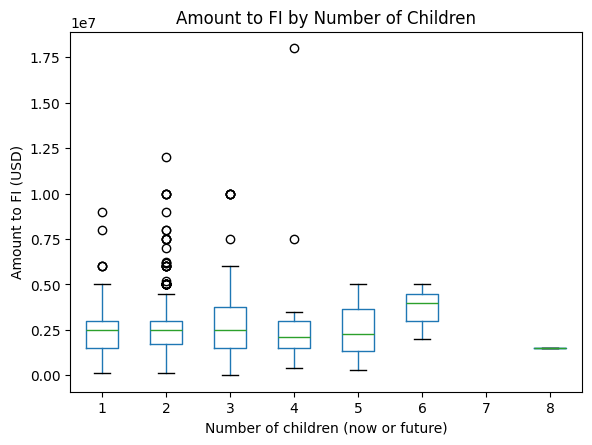

In [17]:
boxplotdata = data[['Totalchildren', 'Amount to retire']].copy()
boxplotdata['Totalchildren'] = pd.Categorical(
    boxplotdata['Totalchildren'],
    categories=range(1, 9)
)
boxplotdata.boxplot(by='Totalchildren', column='Amount to retire', grid=False)
plt.title("Amount to FI by Number of Children")
plt.suptitle('')
plt.xlabel("Number of children (now or future)")
plt.ylabel("Amount to FI (USD)")